# Functions

In [5]:
# include the required modules

import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## User-defined functions

Every function definition begins with the word def followed by the name you want to give to the function, sinc in this case, then a list of arguments enclosed in parentheses, and finally terminated with a colon. In this case there is only one argument, x, but in general there can be as many arguments as you want, including no arguments at all. For the moment, we will consider just the case of a single argument.
The indented block of code following the first line defines what the function does. In this case, the first line calculates $sinc(x) = \sin(x)/x$ and sets it equal to y. The return statement of the last line tells Python to return the value of y to the user.

In [6]:
def sinc(x):
    y = np.sin(x)/x
    return y

**Exercise**

The above defined function delivers a false value at a certain point. Find the error and correct the function appropriately.

In [7]:
# code goes here

The code for *sinc(x)* works just fine when the argument is a single number or a variable that represents a single number. However, if the argument is a NumPy array, we run into a problem, as illustrated below.

In [8]:
 x = np.arange(0, 5., 0.5)

In [9]:
sinc(x)

/Users/fci/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([        nan,  0.95885108,  0.84147098,  0.66499666,  0.45464871,
        0.23938886,  0.04704   , -0.10022378, -0.18920062, -0.21722892])

The if statement in Python is set up to evaluate the truth value of a single variable, not of multielement arrays. When Python is asked to evaluate the truth value for a multi-element array, it doesn’t know what to do and therefore returns an error. An obvious way to handle this problem is to write the code so that it processes the array one element at a time, which you could do using a for loop, as illustrated below.


In [10]:
def sinc(x): 
    y = []
    for xx in x:
        if xx==0.0:
            y+=[1.0]
        else: # adds result of sin(xx)/xx to y list if
            y+=[np.sin(xx)/xx] # xx is not zero
    return np.array(y) # converts y to array and returns array



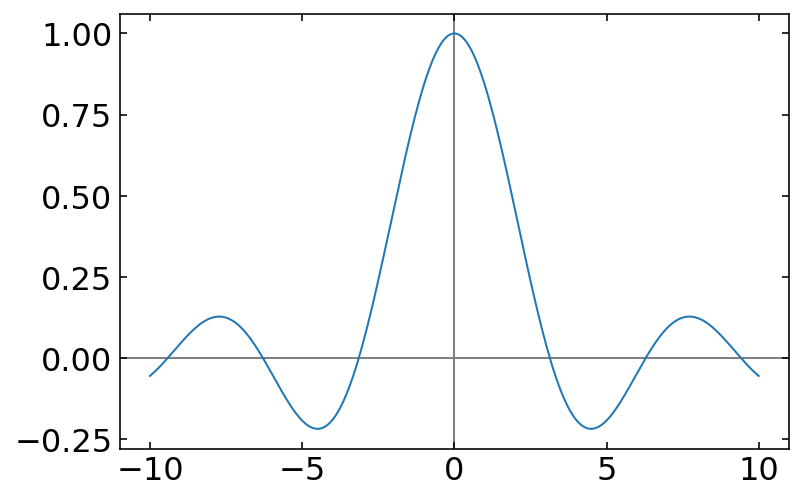

In [11]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(-10, 10, 256)
y = sinc(x)

plt.plot(x, y)
plt.axhline(color="gray", zorder=-1)
plt.axvline(color="gray", zorder=-1)
plt.show()

***
### Faster Array Processing

While using loops to process arrays works just fine, it is usually not the best way to accomplish the task in Python. The reason is that loops in Python are executed rather slowly. To deal with this problem, the developers of NumPy introduced a number of functions designed to process arrays quickly and efficiently. For the present case, what we need is a conditional statement or function that can process arrays directly. The function we want is called where and it is a part of the NumPy library. There where function has the form

~~~
where(condition, output if True, output if False)
~~~

e first argument of the where function is a conditional statement involving an array. The where function applies the condition to the array element by element, and returns the second argument for those array elements for which the condition is True, and returns the third argument for those array elements that are False. We can apply it to the sinc(x) function as follows

In [12]:
def sinc(x):
    z = np.where(x==0.0, 1.0, np.sin(x)/x)
    return(z)

The where function creates the array y and sets the elements of y equal to 1.0 where the corresponding elements of x are zero, and otherwise sets the corresponding elements to sin(x)/x. This code executes much faster, 25 to 100 times, depending on the size of the array, than the code using a for loop. Moreover, the new code is much simpler to write and read.

##  Functions with more than one input or output
Python functions can have any number of input arguments and can return any number of variables. For example, suppose you want a function that outputs n (x, y) coordinates around a circle of radius r centered at the point (x0 , y0 ). The inputs to the function would be r, x0, y0, and n. The outputs would be the n (x, y) coordinates. The following code implements this function.

In [13]:
def circle(r, x0, y0, n):
    theta = np.linspace(0., 2.*np.pi, n, endpoint=False)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x0+x, y0+y

This function has four inputs and two outputs. In this case, the four inputs are simple numeric variables and the two outputs are NumPy arrays. In general, the inputs and outputs can be any combination of data types: arrays, lists, strings, etc. Of course, the body of the function must be written to be consistent with the prescribed data types.
Functions can also return nothing to the calling program but just perform some task. For example, here is a program that clears the terminal screen

***
### Positional and keyword arguments

It is often useful to have function arguments that have some default setting. This happens when you want an input to a function to have some standard value or setting most of the time, but you would like to reserve the possibility of giving it some value other than the default value.

In [14]:
import numpy as np
def circle(r, x0=0.0, y0=0.0, n=12):
    theta = np.linspace(0., 2.*np.pi, n, endpoint=False)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x0+x, y0+y

The default values of the arguments x0, y0, and n are specified in the argument of the function definition in the def line. Arguments whose default values are specified in this manner are called keyword arguments, and they can be omitted from the function call if the user is content using those values.

In [15]:
circle(3)

(array([ 3.00000000e+00,  2.59807621e+00,  1.50000000e+00,  1.83697020e-16,
        -1.50000000e+00, -2.59807621e+00, -3.00000000e+00, -2.59807621e+00,
        -1.50000000e+00, -5.51091060e-16,  1.50000000e+00,  2.59807621e+00]),
 array([ 0.00000000e+00,  1.50000000e+00,  2.59807621e+00,  3.00000000e+00,
         2.59807621e+00,  1.50000000e+00,  3.67394040e-16, -1.50000000e+00,
        -2.59807621e+00, -3.00000000e+00, -2.59807621e+00, -1.50000000e+00]))

***
### Variable number of arguments


While it may seem odd, it is sometimes useful to leave the number of arguments unspecified. A simple example is a function that computes the product of an arbitrary number of numbers:

In [16]:
def product(*args):
    print("args = {}".format(args))
    p = 1
    for num in args:
        p *= num
    return p

The print("args...) statement in the function definition is not necessary, of course, but is put in to show that the argument args is a tuple inside the function. Here it used because one does not know ahead of time how many numbers are to be multiplied together.

The *args argument is also quite useful in another context: when passing the name of a function as an argument in another function. In many cases, the function name that is passed may have a number of parameters that must also be passed but aren’t known ahead of time. If this all sounds a bit confusing—functions calling other functions—a concrete example will help you understand.



In [17]:
def f1(x, a, p): 
        return a*x**p

In [18]:
def test(f, x, h=2, *params):    
    return f(x+h,*params)

In [19]:
test(f1, 3, 2, 1, 3)

125

The order of the parameters is important. The function *test* uses x, the first argument of f1, as its principal argument, and then uses *a* and *p*, in the same order that they are defined in the function f1, to fill in the additional arguments—the parameters—of the function f1.


## Numerical differentiation

We want to use our current knowledge of python and in particular also functions to start with some very useful thing for our physical modeling: 

**Numerical Differentiation**. What we want to calculate, is the derivative of a function $f(x)$ where the function values are given at certain positions $x_{i}$. Since we do not want to calculate the symbolic derivative, we have to get along with an numerical approximation. This can be obtained by looking at the definition of the derivative, i.e. the first derivative 

\begin{equation}
f^{\prime}(x)=\lim_{\delta x->0}\frac{f(x+\delta x)-f(x)}{\delta x}
\end{equation}

If the function values are given at the positions $x_{i}$ with $\delta x_{i}=x_{i+1}-x_{i}$, the an approximate value of the first derivative can be found from 

\begin{equation}
f^{\prime}(x_{i})\approx\frac{f(x+\delta x)-f(x)}{\delta x}=\frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i}}
\end{equation}

This already delivers a good approximation of the first derivative of a function as we see in the next examples. At frist we want to use our knowledge of multiple arguments and functions as an argument.

Suppose we have the following function that numerically computes the value of the derivative of an arbitrary function $f(x)$:



In [20]:
def deriv(f, x, h=1.e-9, *params):
    return (f(x+h, *params)-f(x-h, *params))/(2.*h)

where our function shall be given by:

In [225]:
def f0(x):
    return 4.*x**2

In [226]:
deriv(f0,3)

24.000001985768904

In [227]:
x=np.linspace(0,5,100)

In [228]:
y=f0(x)
yp=deriv(f0,x)

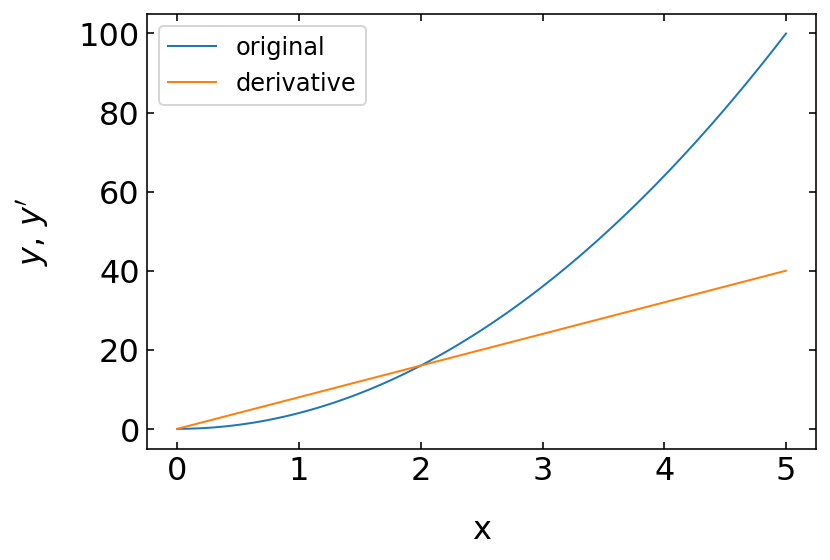

In [229]:
plot(x,y,label='original')
plot(x,yp,label='derivative')
plt.xlabel('x')
plt.ylabel('$y$, $y^{\prime}$')
legend()

### More differentiation


While the above method is good for calculating the derivative of a function if this function is given at certain values, we will later often encounter the situation, that we want to solve a differential equation. As we will see later, this may involve the solution of the Schrödinger equation for an harmonic oscillator or a band structure. 

\begin{equation}
H\Psi=(T+U)\Psi
\end{equation}

where $T$ and $U$ are the kinetic and potential energies and $H$ is the Hamilton operator.
For solving these systems of equations numerically at certain positions (or times) in space (time), it is sometimes usefult to represent a discretized version of the derivatives in form of a matrix.
Such a matrix can be efficiently generated with various python modules. Here we will use the *scipy.sparse* module, which is a module which generated sparse matrices. 

If we consider the above finite difference formulas for a set of positions $x_{i}$, we can represent the derivative at these positions by matrix operation as well:

$f^{\prime}=\frac{1}{\delta x}
\begin{bmatrix}
-1 & 1  & 0 & 0 & 0 & 0\\
 0 & -1 & 1 & 0 & 0 & 0\\
 0 & 0  & -1 & 1 & 0 & 0\\
 0 & 0  & 0  & -1 & 1 & 0\\
 0 & 0  & 0  &  0 & -1 & 1\\
 0 & 0  & 0  &  0 &  0 & -1\\
\end{bmatrix}
\begin{bmatrix}
x_{1}\\
x_{2}\\
x_{3}\\
x_{4}\\
x_{5}\\
x_{6}
\end{bmatrix}
=
\begin{bmatrix}
(x_{2}-x_{1})/\delta x\\
(x_{3}-x_{2})/\delta x\\
(x_{4}-x_{3})/\delta x\\
(x_{5}-x_{4})/\delta x\\
(x_{6}-x_{5})/\delta x\\
(0-x_{6})/\delta x\\
\end{bmatrix}$

Each row of the matrix multiplied by the vector containing the positions is then containing the derivative of the function $f$ at the position $x_{i}$ and the resulting vector represents the deravitave in a certain position region.

In [191]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

In [196]:
x=np.linspace(-5,5,100)
y=x**2

We can construct such a matrix for the first derivative with the help of the [*diags* function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html) of the *scipy.sparse* module. The *diags* function uses a set of numbers, that shoud be distributed along the diagonal of the matrix. If you supply a list like in the example below, the numbers are distributed using the offsets as defined in the second list. The *shape* keyword defines the shape of the matrix. Try the example in the over next cell with the *.todense()* suffix. This converts the otherwise unreadable sparse output to a readable matrix form.

In [206]:
m=diags([-1., 0., 1.], [0,-1, 1],shape=(100,100))/(x[1]-x[0])

In [207]:
diags([-1., 0., 1.], [0,-1, 1],shape=(10,10)).todense()

matrix([[-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])

If this matrix is now multiplied from the right with a vector of function values $f(x_{i})$, you obtain the corresponding derivatives. 

In [208]:
diff=m*y

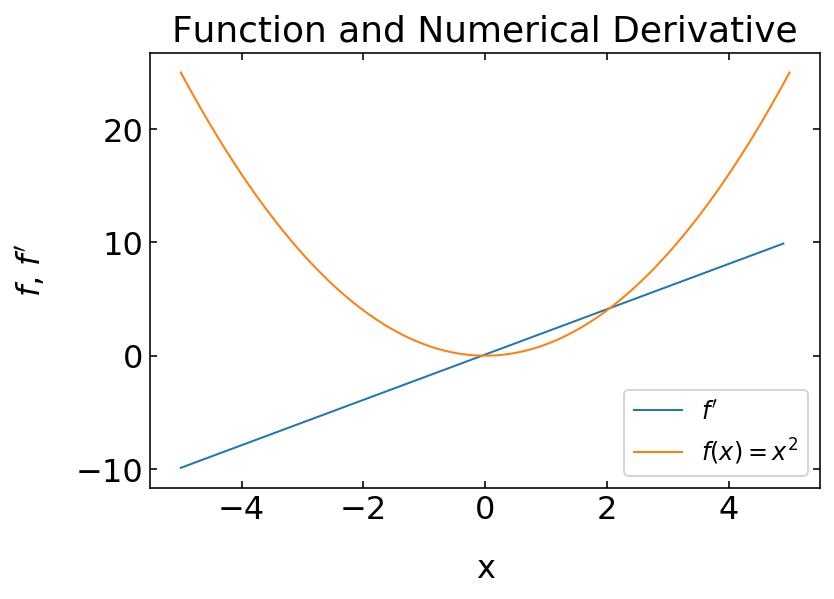

In [211]:
plt.plot(x[:-1],diff[:-1],label='$f^{\prime}$')
plt.plot(x,y,label='$f(x)=x^{2}$')
plt.xlabel('x')
plt.ylabel('$f$, $f^{\prime}$')
plt.legend()
plt.title('Function and Numerical Derivative')
plt.savefig('derivative.pdf', format='pdf')

Similar to what we did above with the first derivative, we can also obtain a version for the second derivative according to the finite differences for the second derivative:

\begin{equation}
f^{''}\approx\frac{f(x+\delta x)-2f(x)+f(x-\delta x)}{\delta x^{2}}
\end{equation}

In [213]:
diags([-2., 1., 1.], [0,-1, 1], shape=(10, 10)).todense()

matrix([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

Equivalently, you may also find a general form for higher order finite difference which can be found [here](https://en.wikipedia.org/wiki/Finite_difference).